# Trabajando con los datos de 'Credit One'
## Preparar y explorar la 'Data'

### Preparar el Problema

#### Entender el Problema

#### Criterios de Aceptación

#### Evaluación de la solución actual

### 1. Preparar el Entorno

#### a) Cargar las librerias

In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#### b) Cargar la información

In [3]:
# Load dataset
filename = '.\data\housing.data.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names)

### 2. Analisis de los datos

#### a) Estadística Descriptiva

In [4]:
# shape: Dimensions of Dataset
print(dataset.shape)

(506, 14)


In [9]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [10]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     1  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [11]:
# descriptions
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611871   11.211933   11.083988    0.069170    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611800   11.211900   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.517787    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.439466    2.1057

In [12]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.18   0.39 -5.62e-02  0.41 -0.22  0.34 -0.37  6.09e-01  0.57   
ZN      -0.18  1.00  -0.51 -3.36e-02 -0.50  0.32 -0.54  0.64 -3.06e-01 -0.31   
INDUS    0.39 -0.51   1.00  4.97e-02  0.74 -0.38  0.61 -0.70  5.93e-01  0.72   
CHAS    -0.06 -0.03   0.05  1.00e+00  0.07  0.10  0.07 -0.08 -7.37e-03 -0.04   
NOX      0.41 -0.50   0.74  6.79e-02  1.00 -0.30  0.71 -0.77  6.11e-01  0.67   
RM      -0.22  0.32  -0.38  1.02e-01 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.34 -0.54   0.61  7.20e-02  0.71 -0.24  1.00 -0.72  4.50e-01  0.50   
DIS     -0.37  0.64  -0.70 -8.46e-02 -0.77  0.21 -0.72  1.00 -4.95e-01 -0.53   
RAD      0.61 -0.31   0.59 -7.37e-03  0.61 -0.21  0.45 -0.49  1.00e+00  0.91   
TAX      0.57 -0.31   0.72 -3.98e-02  0.67 -0.29  0.50 -0.53  9.10e-01  1.00   
PTRATIO  0.27 -0.40   0.38 -1.20e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.37  0.17  -0.35  5.33e-02 -0.

#### b) Visualizacion de los datos

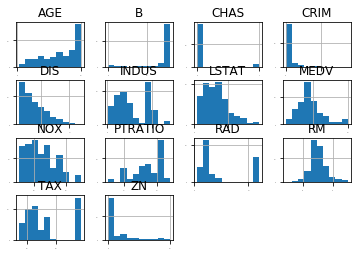

In [14]:
# Unimodel Plots

# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

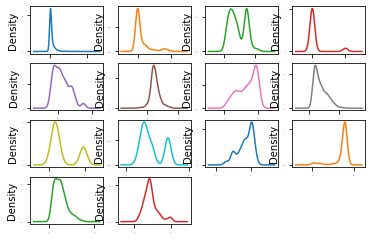

In [15]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()

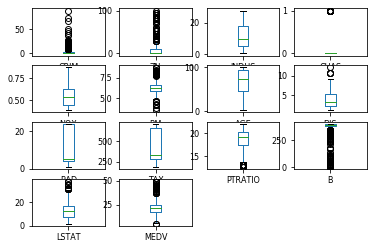

In [16]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

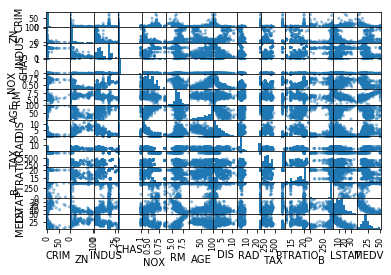

In [17]:
# Multimodal Data Visualizations
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

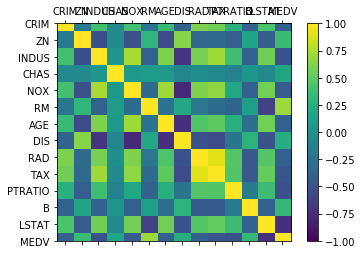

In [18]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

### 3. Preparar los datos

#### a) Limpieza de los datos

#### b) Seleccion de atributos relevantes

#### c) Transformación de los datos

#### c) Salvar los datos